In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

In [2]:
df = pd.read_csv("Dataset\\missionjee_car-sales-report\\Car Sales.xlsx - car_data.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [3]:
print(df.isna().sum())
print(df.info())
print(df.describe(include='all').T)

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($) 

Numeric columns: ['Annual Income', 'Price ($)', 'Phone']
Categorical columns: ['Car_id', 'Date', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']


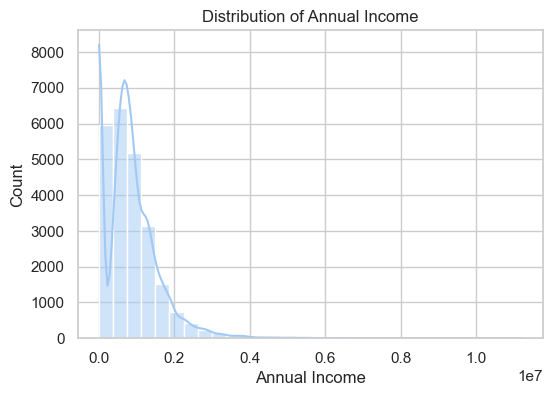

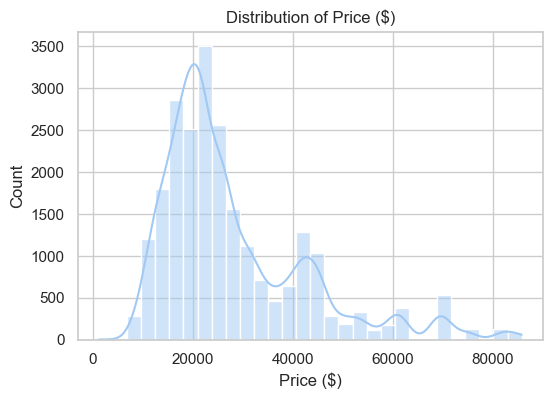

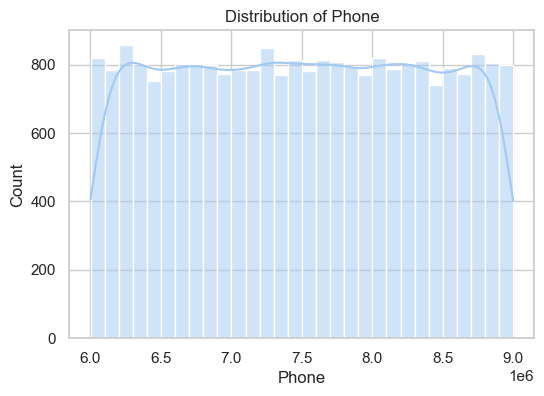

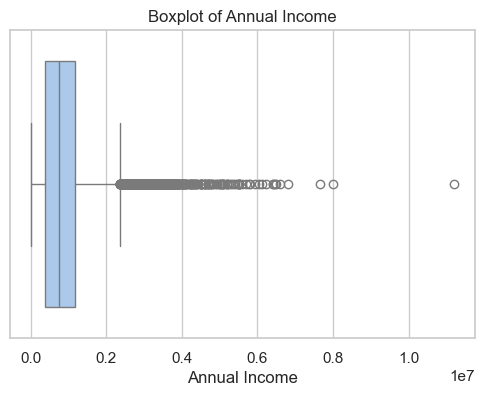

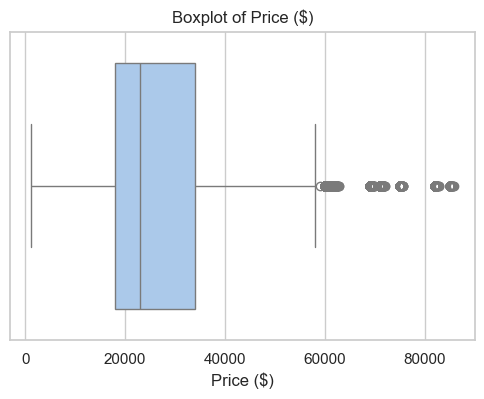

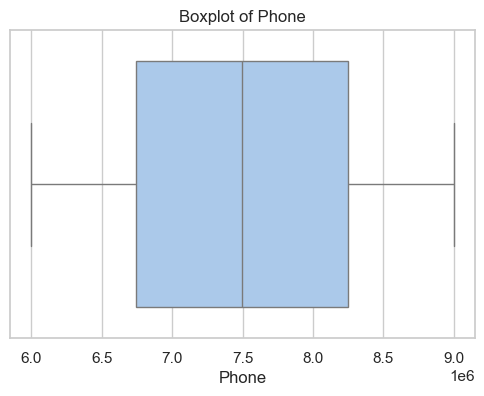

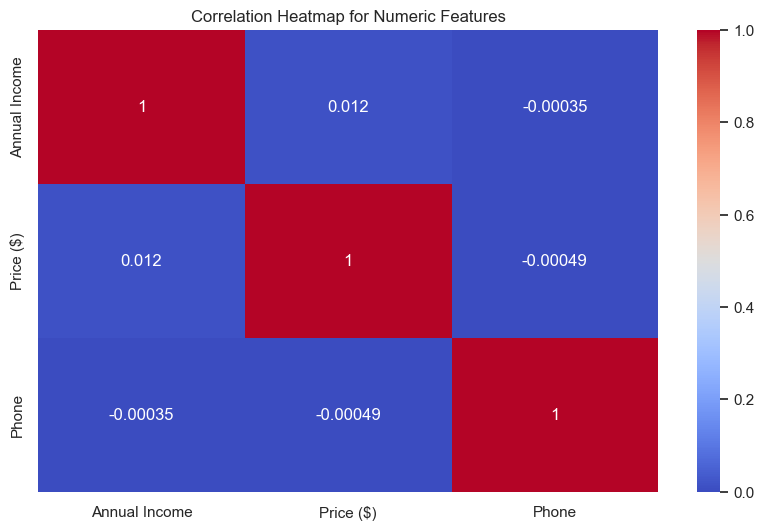

In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30) # type: ignore
    plt.title(f"Distribution of {col}")
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

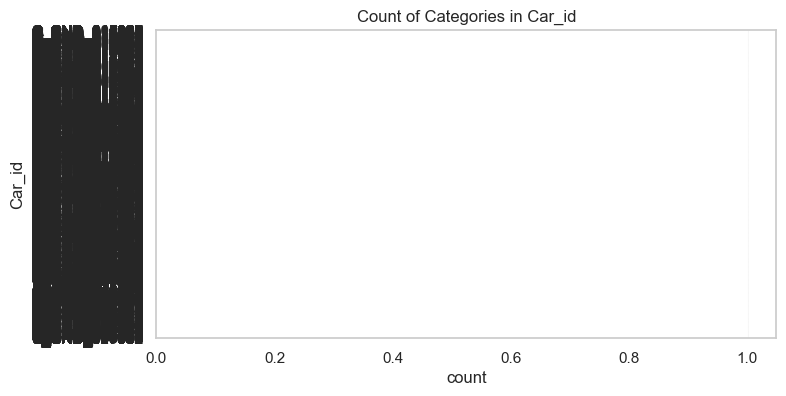

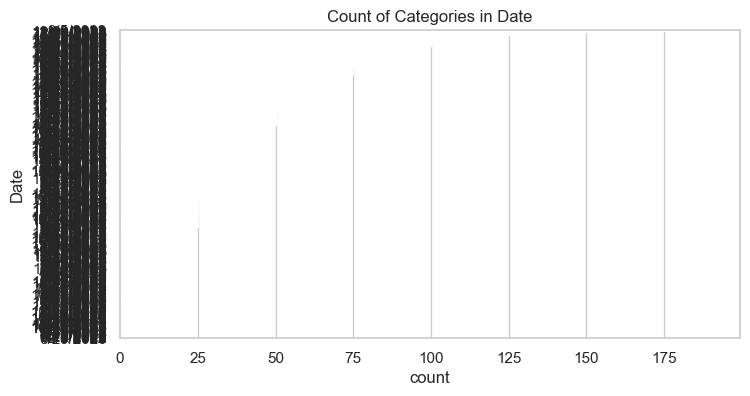

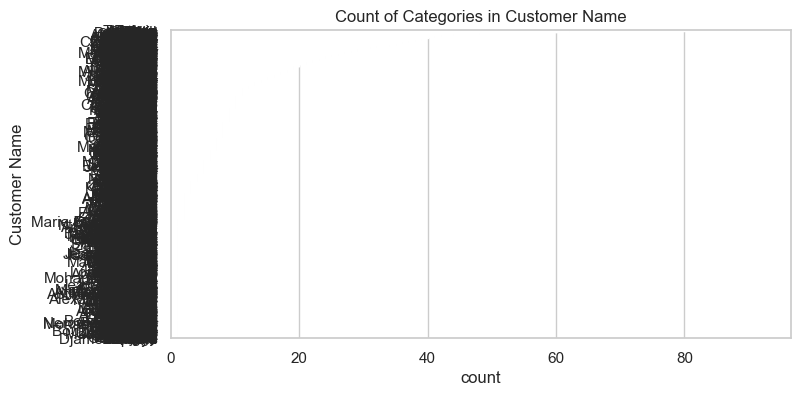

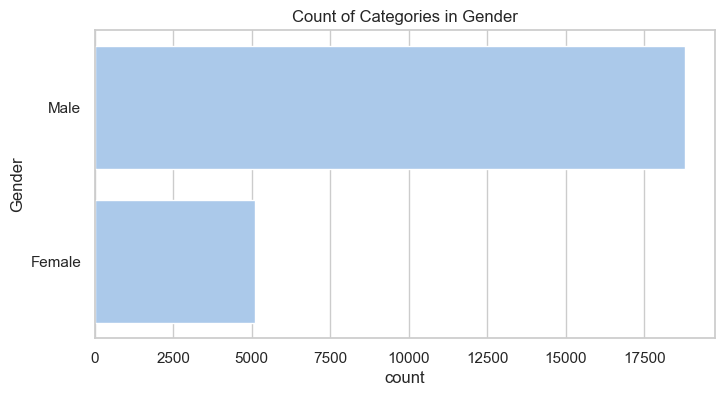

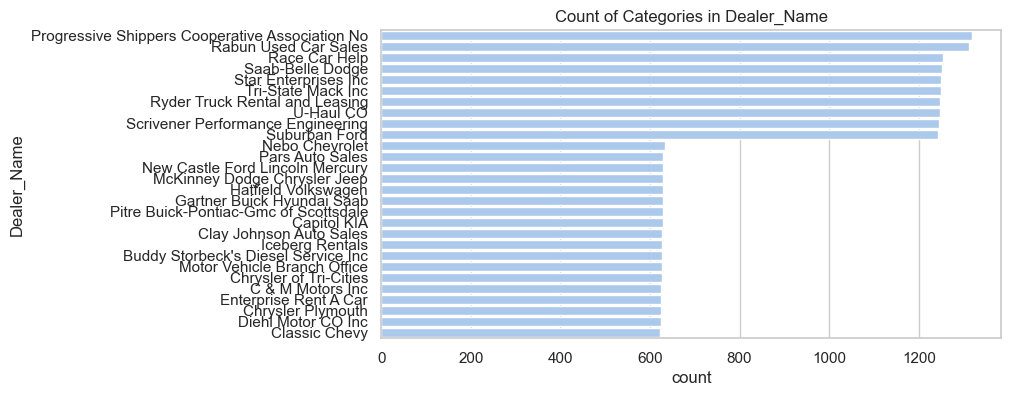

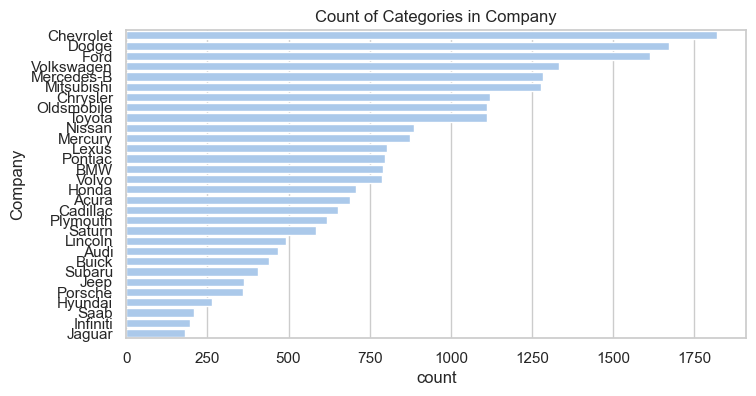

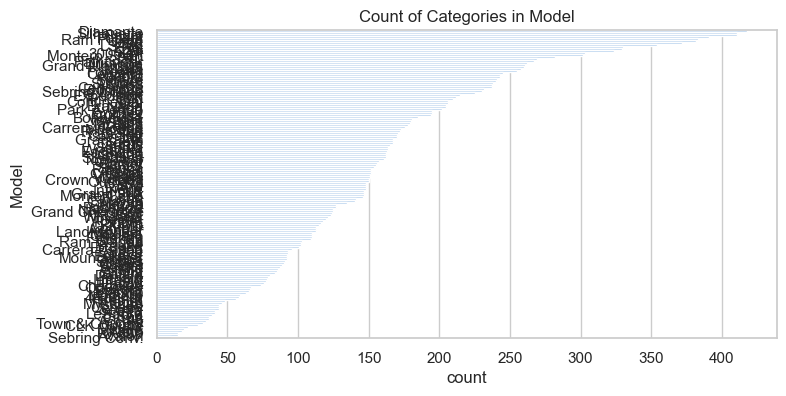

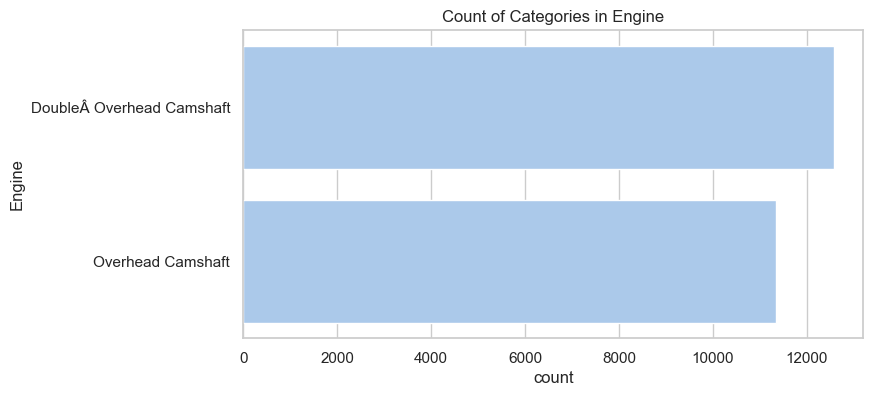

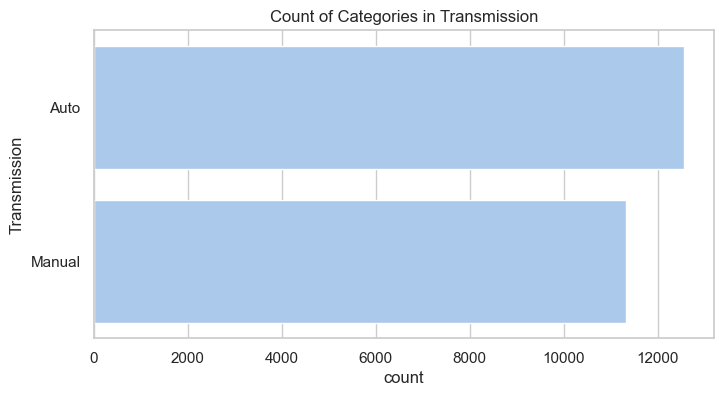

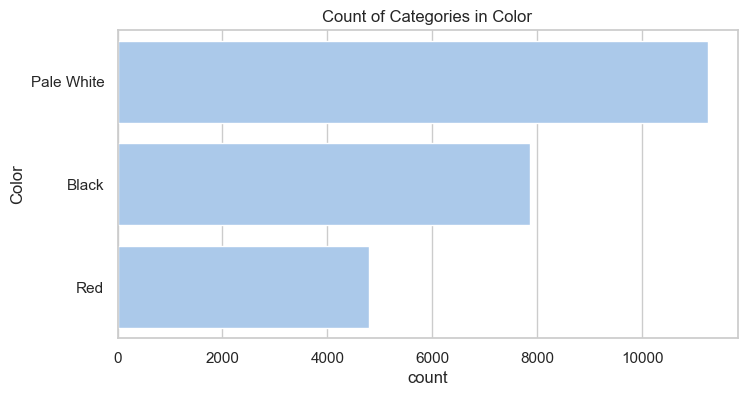

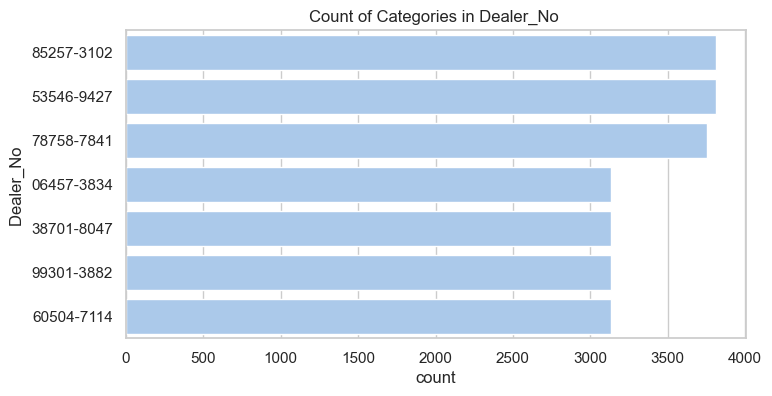

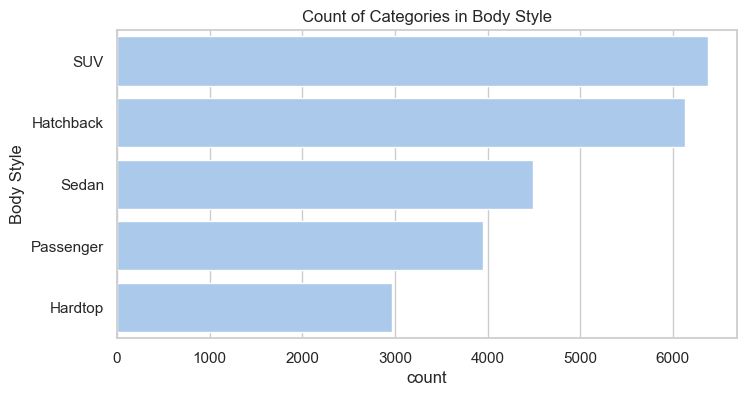

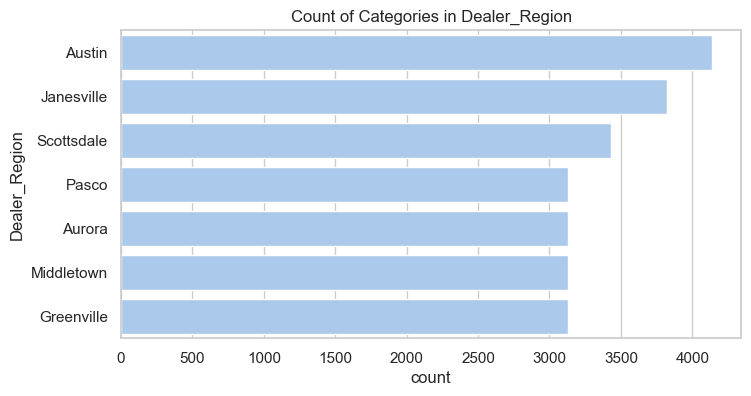

In [5]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of Categories in {col}")
    plt.show()

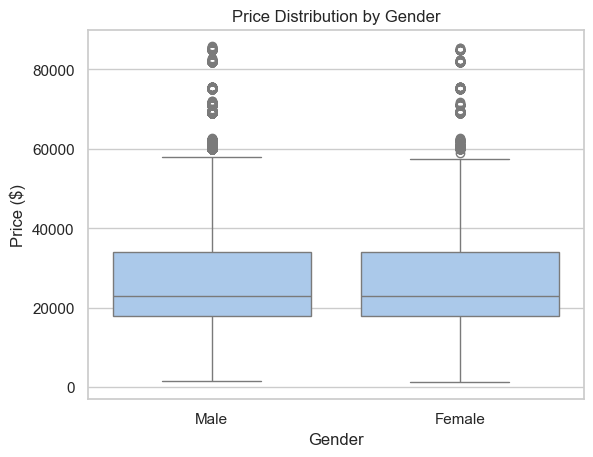

In [6]:
sns.boxplot(x="Gender", y="Price ($)", data=df)
plt.title("Price Distribution by Gender")
plt.show()

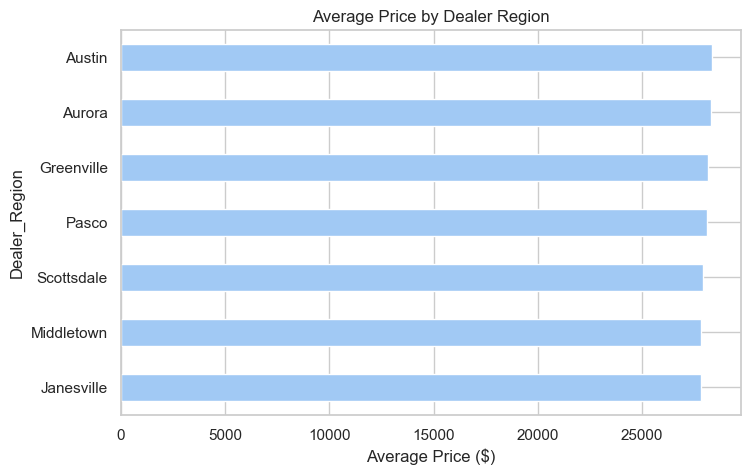

In [7]:
avg_price_region = df.groupby("Dealer_Region")["Price ($)"].mean().sort_values()
avg_price_region.plot(kind='barh', figsize=(8,5), title="Average Price by Dealer Region")
plt.xlabel("Average Price ($)")
plt.show()

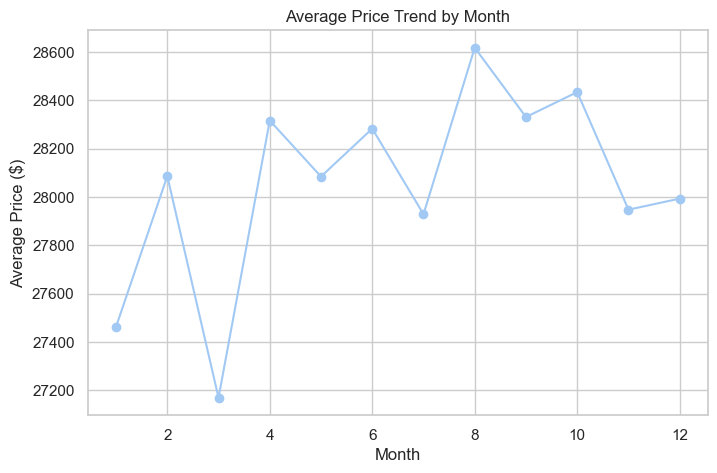

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(8,5))
df.groupby('Month')['Price ($)'].mean().plot(marker='o')
plt.title("Average Price Trend by Month")
plt.ylabel("Average Price ($)")
plt.show()


In [9]:
print("Top 5 most common colors:\n", df['Color'].value_counts().head())
print("\nAverage Price by Car Model:\n", df.groupby('Model')['Price ($)'].mean().sort_values(ascending=False).head(10))
print("\nDealer Regions by Average Income:\n", df.groupby('Dealer_Region')['Annual Income'].mean().sort_values(ascending=False))


Top 5 most common colors:
 Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64

Average Price by Car Model:
 Model
Catera         56836.933333
DeVille        46154.050000
Contour        45309.079646
Integra        44604.000000
Tacoma         44576.743017
Firebird       43085.946429
Continental    42612.004854
Sable          42286.736527
Taurus         42158.598802
Eldorado       41919.857759
Name: Price ($), dtype: float64

Dealer Regions by Average Income:
 Dealer_Region
Pasco         853975.290323
Aurora        845510.435783
Janesville    833916.268778
Greenville    832667.512788
Middletown    825592.651854
Austin        822849.572189
Scottsdale    805682.702884
Name: Annual Income, dtype: float64


               Annual Income  Price ($)     Phone     Month
Annual Income       1.000000   0.012065 -0.000351 -0.015141
Price ($)           0.012065   1.000000 -0.000493  0.006856
Phone              -0.000351  -0.000493  1.000000  0.005470
Month              -0.015141   0.006856  0.005470  1.000000


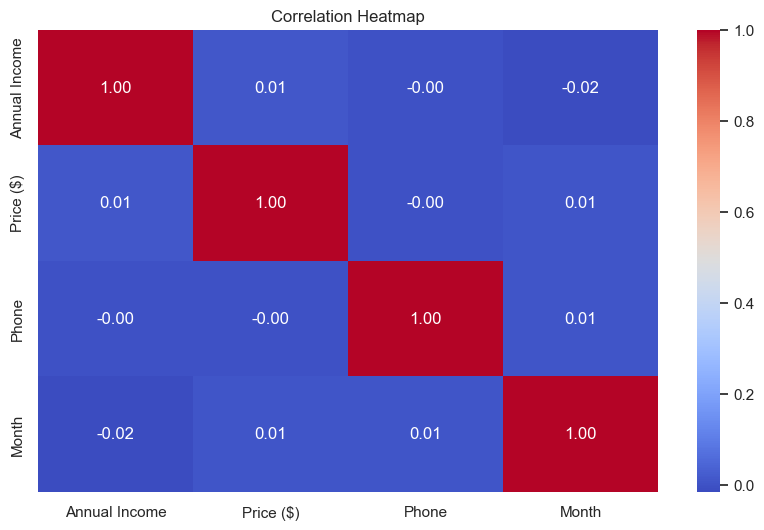

In [10]:
corr = df.corr(numeric_only=True)
print(corr)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()